In [143]:
import pandas as pd
import numpy as np 
from scipy import stats
from scipy.stats import f
from statsmodels.stats import weightstats as stests

In [144]:
df = pd.read_csv('AnaQ5_final.csv')
df[['Round1','Round2','Round3','Round4','Round5','Round6','Round7','Round8']].describe()
df.head(10)

,Answer_Code,Round1,Round2,Round3,Round4,Round5,Round6,Round7,Round8
0,11,243,0,0,0,0,0,0,0
1,12,156,92,0,0,0,0,0,0
2,13,108,67,54,0,0,0,0,0
3,14,283,97,35,40,0,0,0,0
4,15,166,175,52,24,33,0,0,0
5,16,201,263,153,46,16,33,14,0
6,17,16,70,62,55,14,5,15,0
7,18,128,87,116,49,34,9,6,23


In [145]:
# measuring the influence between response 1 and 2
ttest,pval = stats.ttest_rel(df['Round1'], df['Round2'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.18651262389257783
accept null hypothesis


In [146]:
# measuring the influence between response 2 and 3
ttest,pval = stats.ttest_rel(df['Round2'], df['Round3'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.05068794136841429
accept null hypothesis


In [147]:
# measuring the influence between response 3 and 4
ttest,pval = stats.ttest_rel(df['Round3'], df['Round4'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.058230789245405486
accept null hypothesis


In [148]:
# measuring the influence between response 4 and 5
ttest,pval = stats.ttest_rel(df['Round4'], df['Round5'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.07639404722480478
accept null hypothesis


In [149]:
# measuring the influence between response 5 and 6
ttest,pval = stats.ttest_rel(df['Round5'], df['Round6'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.30317460923496636
accept null hypothesis


In [150]:
# measuring the influence between response 6 and 7
ttest,pval = stats.ttest_rel(df['Round6'], df['Round7'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.613831796614976
accept null hypothesis


In [151]:
# measuring the influence between response 7 and 8
ttest,pval = stats.ttest_rel(df['Round7'], df['Round8'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.6824075035175572
accept null hypothesis


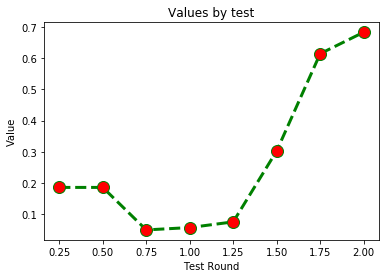

In [152]:
import matplotlib.pyplot as plt 
  
# x axis values 
y = [0.18651262389257783, 0.18651262389257783, 
0.05068794136841429, 0.058230789245405486, 0.07639404722480478, 0.30317460923496636, 
0.613831796614976, 0.6824075035175572] 
# corresponding y axis values 
x = [0.25,0.50,0.75,1,1.25,1.50,1.75,2] 
  
# plotting the points  
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='red', markersize=12) 
  
# naming the x axis 
plt.xlabel('Test Round') 
# naming the y axis 
plt.ylabel('Value') 
  
# giving a title to my graph 
plt.title('Values by test') 
  
# function to show the plot 
plt.show() 

In [153]:
# alternate testing - measuring the influence between response 1 and 2
ztest ,pval1 = stests.ztest(df['Round1'], x2=df['Round2'], value=0,alternative='two-sided')
print(float(pval1))

0.16579838578697648


In [154]:
# measuring the influence between responses all groups
def ssd(ser):       
    s1 = pow(ser,2).sum()
    s2 = pow(ser.sum(),2) / ser.size
    return s1-s2

def dftoser(df):  
    ser = pd.Series()
    for i in range(len(df.columns)):
        ser = ser.append(df.iloc[:,i])
    return ser

def pro_anova1(inframe):                  
    k = len(inframe.columns)
    
    allser = dftoser(inframe)
    n_t = allser.size
    
    df_t = n_t - 1
    df_bg = k - 1
    df_wg = n_t - k
    
    ss_t = ssd(allser)

    ss_wg = 0
    for i in range(k):
        ss_wg += ssd(inframe.iloc[:,i])
    

    ss_bg = ss_t - ss_wg
    
   
    ms_wg = ss_wg / df_wg
    
 
    ms_bg = ss_bg / df_bg
    
   
    F = ms_bg / ms_wg 
    p = f.sf(F, df_bg, df_wg, loc=0, scale=1)
    
    print('Between groups (effect):\t SS_bg = {:8.4f}, \t df_bg = {:3d}, \t ms_bg = {:8.4f}'.format(ss_bg, df_bg, ms_bg))
    print('  Within groups (error):\t SS_wg = {:8.4f}, \t df_wg = {:3d}, \t ms_wg = {:8.4f}'.format(ss_wg, df_wg, ms_wg))
    print('                  TOTAL:\t  SS_t = {:8.4f}, \t  df_t = {:3d}'.format(ss_t, df_t))
    print('F = {:8.4f}, p = {:8.4f}'.format(F, p))        
    
    return F, p

testdata = pd.read_csv('AnaQ5_final.csv')

F, p = pro_anova1(pd.DataFrame(testdata))

Between groups (effect):	 SS_bg = 200688.2500, 	 df_bg =   8, 	 ms_bg = 25086.0312
  Within groups (error):	 SS_wg = 119207.7500, 	 df_wg =  63, 	 ms_wg = 1892.1865
                  TOTAL:	  SS_t = 319896.0000, 	  df_t =  71
F =  13.2577, p =   0.0000


In [155]:
df_chi = pd.read_csv('AnaQ5_final.csv')

In [156]:
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]]


In [157]:
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
 [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
 [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
 [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
 [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
 [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
 [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
 [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]]


In [158]:
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
df11=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)
alpha = 0.05

Degree of Freedom:-    Answer_Code  Round1  Round2  Round3  Round4  Round5  Round6  Round7  Round8
0           11     243       0       0       0       0       0       0       0
1           12     156      92       0       0       0       0       0       0
2           13     108      67      54       0       0       0       0       0
3           14     283      97      35      40       0       0       0       0
4           15     166     175      52      24      33       0       0       0
5           16     201     263     153      46      16      33      14       0
6           17      16      70      62      55      14       5      15       0
7           18     128      87     116      49      34       9       6      23


In [159]:

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 14.0


In [160]:
critical_value=chi2.ppf(q=1-alpha,df=df11)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [161]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df11)
print('p-value:',p_value)

p-value: 0.00018281063298186684


In [162]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',df11)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 14.0
critical_value: 3.841458820694124
p-value: 0.00018281063298186684


In [163]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
